In [16]:
"""
该代码用于绘制原始GO/HPO/Mesh和Alterome数据的富集分析结果

用于绘制分组柱状图
绘制逻辑应该和Alterome的差不多
"""

'\n该代码用于绘制原始GO/HPO/Mesh和Alterome数据的富集分析结果\n\n用于绘制分组柱状图\n绘制逻辑应该和Alterome的差不多\n'

In [17]:
import os
from collections import defaultdict
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import re
import matplotlib.patches as mpatches
import math

In [18]:
## 一些脚本参数

# db, alterome
plot_type = 'alterome'

# top-n term in each ontology for plot
top_n = 10

# p-value-type: p-value p-bonferroni    p-benjamin
# Bonferroni校正：用于少量测试且需要严格控制假阳性的情况。
# Benjamini-Hochberg校正：用于大量测试且需要平衡假阳性和发现能力的情况。
p_value_type = 'p-bonferroni'



In [19]:
enrich_path = '/mnt/disk1/xzyao/AD-PNRLE/AD-Alterome调整-2024/result/enrichment_result'

fig_save_path = '/mnt/disk1/xzyao/AD-PNRLE/AD-Alterome调整-2024/result/paper_visualization'

if plot_type == 'db':   
    enrich_file_list = ['mito-gene.top-20.db-GO.tsv', 'mito-gene.top-20.db-HP.tsv', 'mito-gene.top-20.db-MESH.AG.tsv']
    fig_save_file = f'{fig_save_path}/db-enrichment.bar.png'
else:
    enrich_file_list = ['mito-gene.top-20.alterome-GO.tsv', 'mito-gene.top-20.alterome-HP.tsv', 'mito-gene.top-20.alterome-MESH.tsv']
    fig_save_file = f'{fig_save_path}/alterome-enrichment.bar.png'


In [20]:

# go: {GO:****. GO: ****}
type_to_term = defaultdict(list)

# term_to_p_value
term_to_p_value = {}


In [21]:
for file in enrich_file_list:
    file_path = f'{enrich_path}/{file}'

    if 'GO' in file:
        file_type = 'GO'
    elif 'HP' in file:
        file_type = 'HPO'
    elif 'MESH' in file:
        file_type = 'MeSH'
    else:
        print(f'wrong file type: {file}')
        input()
        continue


    with open(file_path) as f:
        head = f.readline().strip().split('\t')
        for line in f:
            l = line.strip().split('\t')

            term_id = l[0]
            term = l[1]

            
            p_value = float(l[head.index(p_value_type)])

            type_to_term[file_type].append(f'{term_id} {term}')

            # -log p
            neg_log_p_value = - math.log(p_value)
            
            term_to_p_value[f'{term_id} {term}'] = float(neg_log_p_value)

            if len(type_to_term[file_type]) >= top_n:
                break

print(f'data loaded.')            

data loaded.


In [22]:
type_to_term

defaultdict(list,
            {'GO': ['GO:0000266 mitochondrial fission',
              'GO:0045333 cellular respiration',
              'GO:0007005 mitochondrion organization',
              'GO:0000423 mitophagy',
              'GO:0008053 mitochondrial fusion',
              'GO:0006119 oxidative phosphorylation',
              'GO:0051882 mitochondrial depolarization',
              'GO:0006839 mitochondrial transport',
              'GO:0018158 protein oxidation',
              'GO:0048311 mitochondrion distribution'],
             'HPO': ['HP:0001427 Mitochondrial inheritance',
              'HP:0003737 Mitochondrial myopathy',
              'HP:0001138 Optic neuropathy',
              'HP:0100315 Lewy bodies',
              'HP:0008322 Abnormal mitochondrial morphology',
              'HP:0003546 Exercise intolerance',
              'HP:0030774 Mitochondrial swelling',
              'HP:0006789 Mitochondrial encephalopathy',
              'HP:0030219 Semantic dementia',
        

In [23]:
term_to_p_value

{'GO:0000266 mitochondrial fission': 25.559869695139305,
 'GO:0045333 cellular respiration': 16.32631597655021,
 'GO:0007005 mitochondrion organization': 11.229392121259297,
 'GO:0000423 mitophagy': 8.382862251231202,
 'GO:0008053 mitochondrial fusion': 7.06709202817994,
 'GO:0006119 oxidative phosphorylation': 4.592514798195257,
 'GO:0051882 mitochondrial depolarization': 3.455488671211003,
 'GO:0006839 mitochondrial transport': 2.991797936967342,
 'GO:0018158 protein oxidation': 0.8928867538165722,
 'GO:0048311 mitochondrion distribution': 0.8928867538165722,
 'HP:0001427 Mitochondrial inheritance': 434.61091678128435,
 'HP:0003737 Mitochondrial myopathy': 6.405366036405732,
 'HP:0001138 Optic neuropathy': 4.3063587633712705,
 'HP:0100315 Lewy bodies': 2.61145835086437,
 'HP:0008322 Abnormal mitochondrial morphology': 1.7044715930411944,
 'HP:0003546 Exercise intolerance': 1.7044715930411944,
 'HP:0030774 Mitochondrial swelling': 1.7044715930411944,
 'HP:0006789 Mitochondrial encepha

In [24]:
# 整理绘图数据
#plot_type_list = ['GO', 'HPO', 'MeSH']
plot_type_list = ['GO', 'HPO', 'MeSH'][::-1]

# 越来越深色
color_1 = '#ccd6bc'
color_2 = '#edc4b8'
color_3 = '#cacde8'

color_4 = '#a5b38f' 
color_5 = '#d2927f' 
color_6 = '#9499c7' 

color_7 = '#85946d'
color_8 = '#b56e59'
color_9 = '#6e73a8'

color_list = [color_1, color_2, color_3]

# color for y ticks
#label_color_list = [color_4, color_5, color_6]
label_color_list = [color_7, color_8, color_9]

unique_color_label = {}

plot_term_list = []
plot_term_color_list = []
plot_label_color_list = []
for idx, term_type in enumerate(plot_type_list):
    term_list = type_to_term[term_type]
    color = color_list[idx]

    # 反过来，p-value大的放上面
    plot_term_list.extend(term_list[::-1])
    plot_term_color_list.extend([color_list[idx]] * len(term_list))
    plot_label_color_list.extend([label_color_list[idx]] * len(term_list))

    unique_color_label[term_type] = color

plot_term_count_list = [term_to_p_value[term] for term in plot_term_list]




In [25]:
print(len(plot_term_list))
print(len(plot_term_color_list))
print(len(plot_term_count_list))

print(len(unique_color_label))

30
30
30
3


In [26]:
plot_term_list

['MESH:D007888 Leigh syndrome',
 'MESH:D018376 abnormal mitosis',
 "MESH:D000690 Alzheimer's and amyotrophic lateral sclerosis",
 'MESH:D008659 metabolic dysfunction',
 'MESH:D009410 neuronal dysfunction',
 'MESH:D064420 cytotoxic aggregation',
 'MESH:D020258 neurotoxicity',
 'MESH:D006816 HD',
 'MESH:C564925 dysfunctional mitochondria',
 'MESH:D028361 mitochondrial dysfunction',
 'HP:0034692 Elongated mitochondria',
 'HP:0030219 Semantic dementia',
 'HP:0006789 Mitochondrial encephalopathy',
 'HP:0030774 Mitochondrial swelling',
 'HP:0003546 Exercise intolerance',
 'HP:0008322 Abnormal mitochondrial morphology',
 'HP:0100315 Lewy bodies',
 'HP:0001138 Optic neuropathy',
 'HP:0003737 Mitochondrial myopathy',
 'HP:0001427 Mitochondrial inheritance',
 'GO:0048311 mitochondrion distribution',
 'GO:0018158 protein oxidation',
 'GO:0006839 mitochondrial transport',
 'GO:0051882 mitochondrial depolarization',
 'GO:0006119 oxidative phosphorylation',
 'GO:0008053 mitochondrial fusion',
 'GO:0

In [27]:
# 这一格子调整绘图数据
term_to_p_value

{'GO:0000266 mitochondrial fission': 25.559869695139305,
 'GO:0045333 cellular respiration': 16.32631597655021,
 'GO:0007005 mitochondrion organization': 11.229392121259297,
 'GO:0000423 mitophagy': 8.382862251231202,
 'GO:0008053 mitochondrial fusion': 7.06709202817994,
 'GO:0006119 oxidative phosphorylation': 4.592514798195257,
 'GO:0051882 mitochondrial depolarization': 3.455488671211003,
 'GO:0006839 mitochondrial transport': 2.991797936967342,
 'GO:0018158 protein oxidation': 0.8928867538165722,
 'GO:0048311 mitochondrion distribution': 0.8928867538165722,
 'HP:0001427 Mitochondrial inheritance': 434.61091678128435,
 'HP:0003737 Mitochondrial myopathy': 6.405366036405732,
 'HP:0001138 Optic neuropathy': 4.3063587633712705,
 'HP:0100315 Lewy bodies': 2.61145835086437,
 'HP:0008322 Abnormal mitochondrial morphology': 1.7044715930411944,
 'HP:0003546 Exercise intolerance': 1.7044715930411944,
 'HP:0030774 Mitochondrial swelling': 1.7044715930411944,
 'HP:0006789 Mitochondrial encepha

In [28]:
plot_term_count_list[plot_term_list.index('HP:0001427 Mitochondrial inheritance')] = 60
plot_term_count_list[plot_term_list.index('MESH:D028361 mitochondrial dysfunction')] = 55

plot_term_list[plot_term_list.index("MESH:D000690 Alzheimer's and amyotrophic lateral sclerosis")] = "MESH:D000690 Alzheimer's and ALS"
plot_term_list[plot_term_list.index("MESH:D006816 HD")] = "MESH:D0006816 Huntington Disease"

/mnt/disk1/xzyao/AD-PNRLE/AD-Alterome调整-2024/result/paper_visualization/alterome-enrichment.bar.png saved.


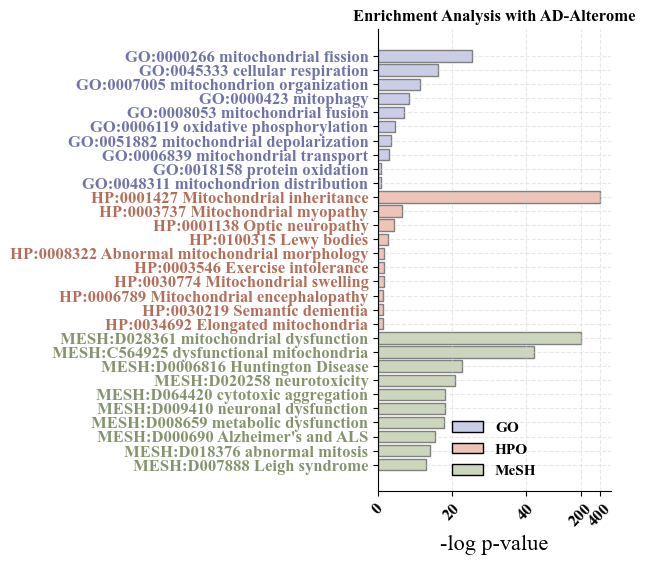

In [31]:
# 开始绘制柱状图

#fig_save_path = '/mnt/disk1/xzyao/AD-PNRLE/AD-Alterome调整-2024/result/paper_visualization'
#fig_save_file = f'{fig_save_path}/genetic-alteration.bar.png'

bar_width = 0.8

plt.figure(figsize=(3, 6))

# 竖着的柱状图
#plt.bar(plot_term_list, plot_term_count_list, color=plot_term_color_list, 
#        width=bar_width, edgecolor='#808080')
#_ = plt.xticks(fontsize=14, fontname='Times New Roman',rotation=90)

# 横着的柱状图
plt.barh(plot_term_list, plot_term_count_list, color=plot_term_color_list,
         height=bar_width, edgecolor='#808080')

_ = plt.yticks(fontsize=12, fontname='Times New Roman',  fontweight='bold')

for i, label in enumerate(plt.gca().get_yticklabels()):
    label.set_color(plot_label_color_list[i])



_ = plt.xticks([60, 55, 40, 20, 0],
           ['400', '200','40', '20', '0'],
           fontsize=12, fontname='Times New Roman', rotation=45, fontweight='bold')
#plt.ylabel('# of Genetic Alterations',
#           fontsize=16, fontname='Times New Roman')

plt.xlabel('-log p-value',
           fontsize=16, fontname='Times New Roman')


# 隐藏坐标轴
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
#ax.spines['left'].set_visible(False)

# 定制一个legend'
patches = [mpatches.Patch(facecolor=color, edgecolor='black',
                          label=label) for label, color in unique_color_label.items()][::-1]
_ = plt.legend(handles=patches, frameon=False, loc='lower center',
           prop={'family': 'Times New Roman', 'size': 11, 'weight': 'bold'})

plt.title("Enrichment Analysis with AD-Alterome", fontsize=12,
          fontname='Times New Roman', fontweight='bold')

plt.grid(color='lightgray', linestyle='--', alpha=0.5)


plt.savefig(fig_save_file, dpi=360, bbox_inches='tight')
print(f'{fig_save_file} saved.')

In [30]:
unique_color_label

{'MeSH': '#ccd6bc', 'HPO': '#edc4b8', 'GO': '#cacde8'}